In [75]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [46]:
df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [47]:
df = df.drop('ID',axis=1)

In [48]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [49]:
print('Experience cannot be negative hence we will have to replace all such instance with mean or median')

Experience cannot be negative hence we will have to replace all such instance with mean or median


In [50]:
df.Experience[df.Experience>0].mean()

20.60589922163048

In [53]:
#replacing the negative experience with mean of the experience which are positive
df.Experience[df.Experience<0] = 20.605

C:\Users\sumans\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
df[df.Experience==20.605]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,20.605,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,20.605,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,20.605,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,20.605,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,20.605,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,20.605,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,20.605,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,20.605,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,20.605,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,20.605,125,92835,2,7.20,1,0,0,1,0,0,1


In [54]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.333892,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.253020,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.605000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


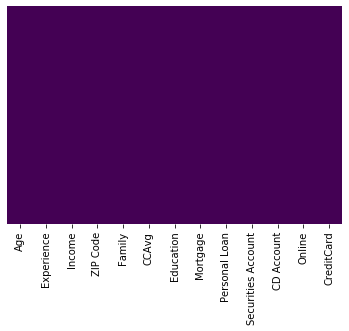

In [67]:
#checking for null value
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

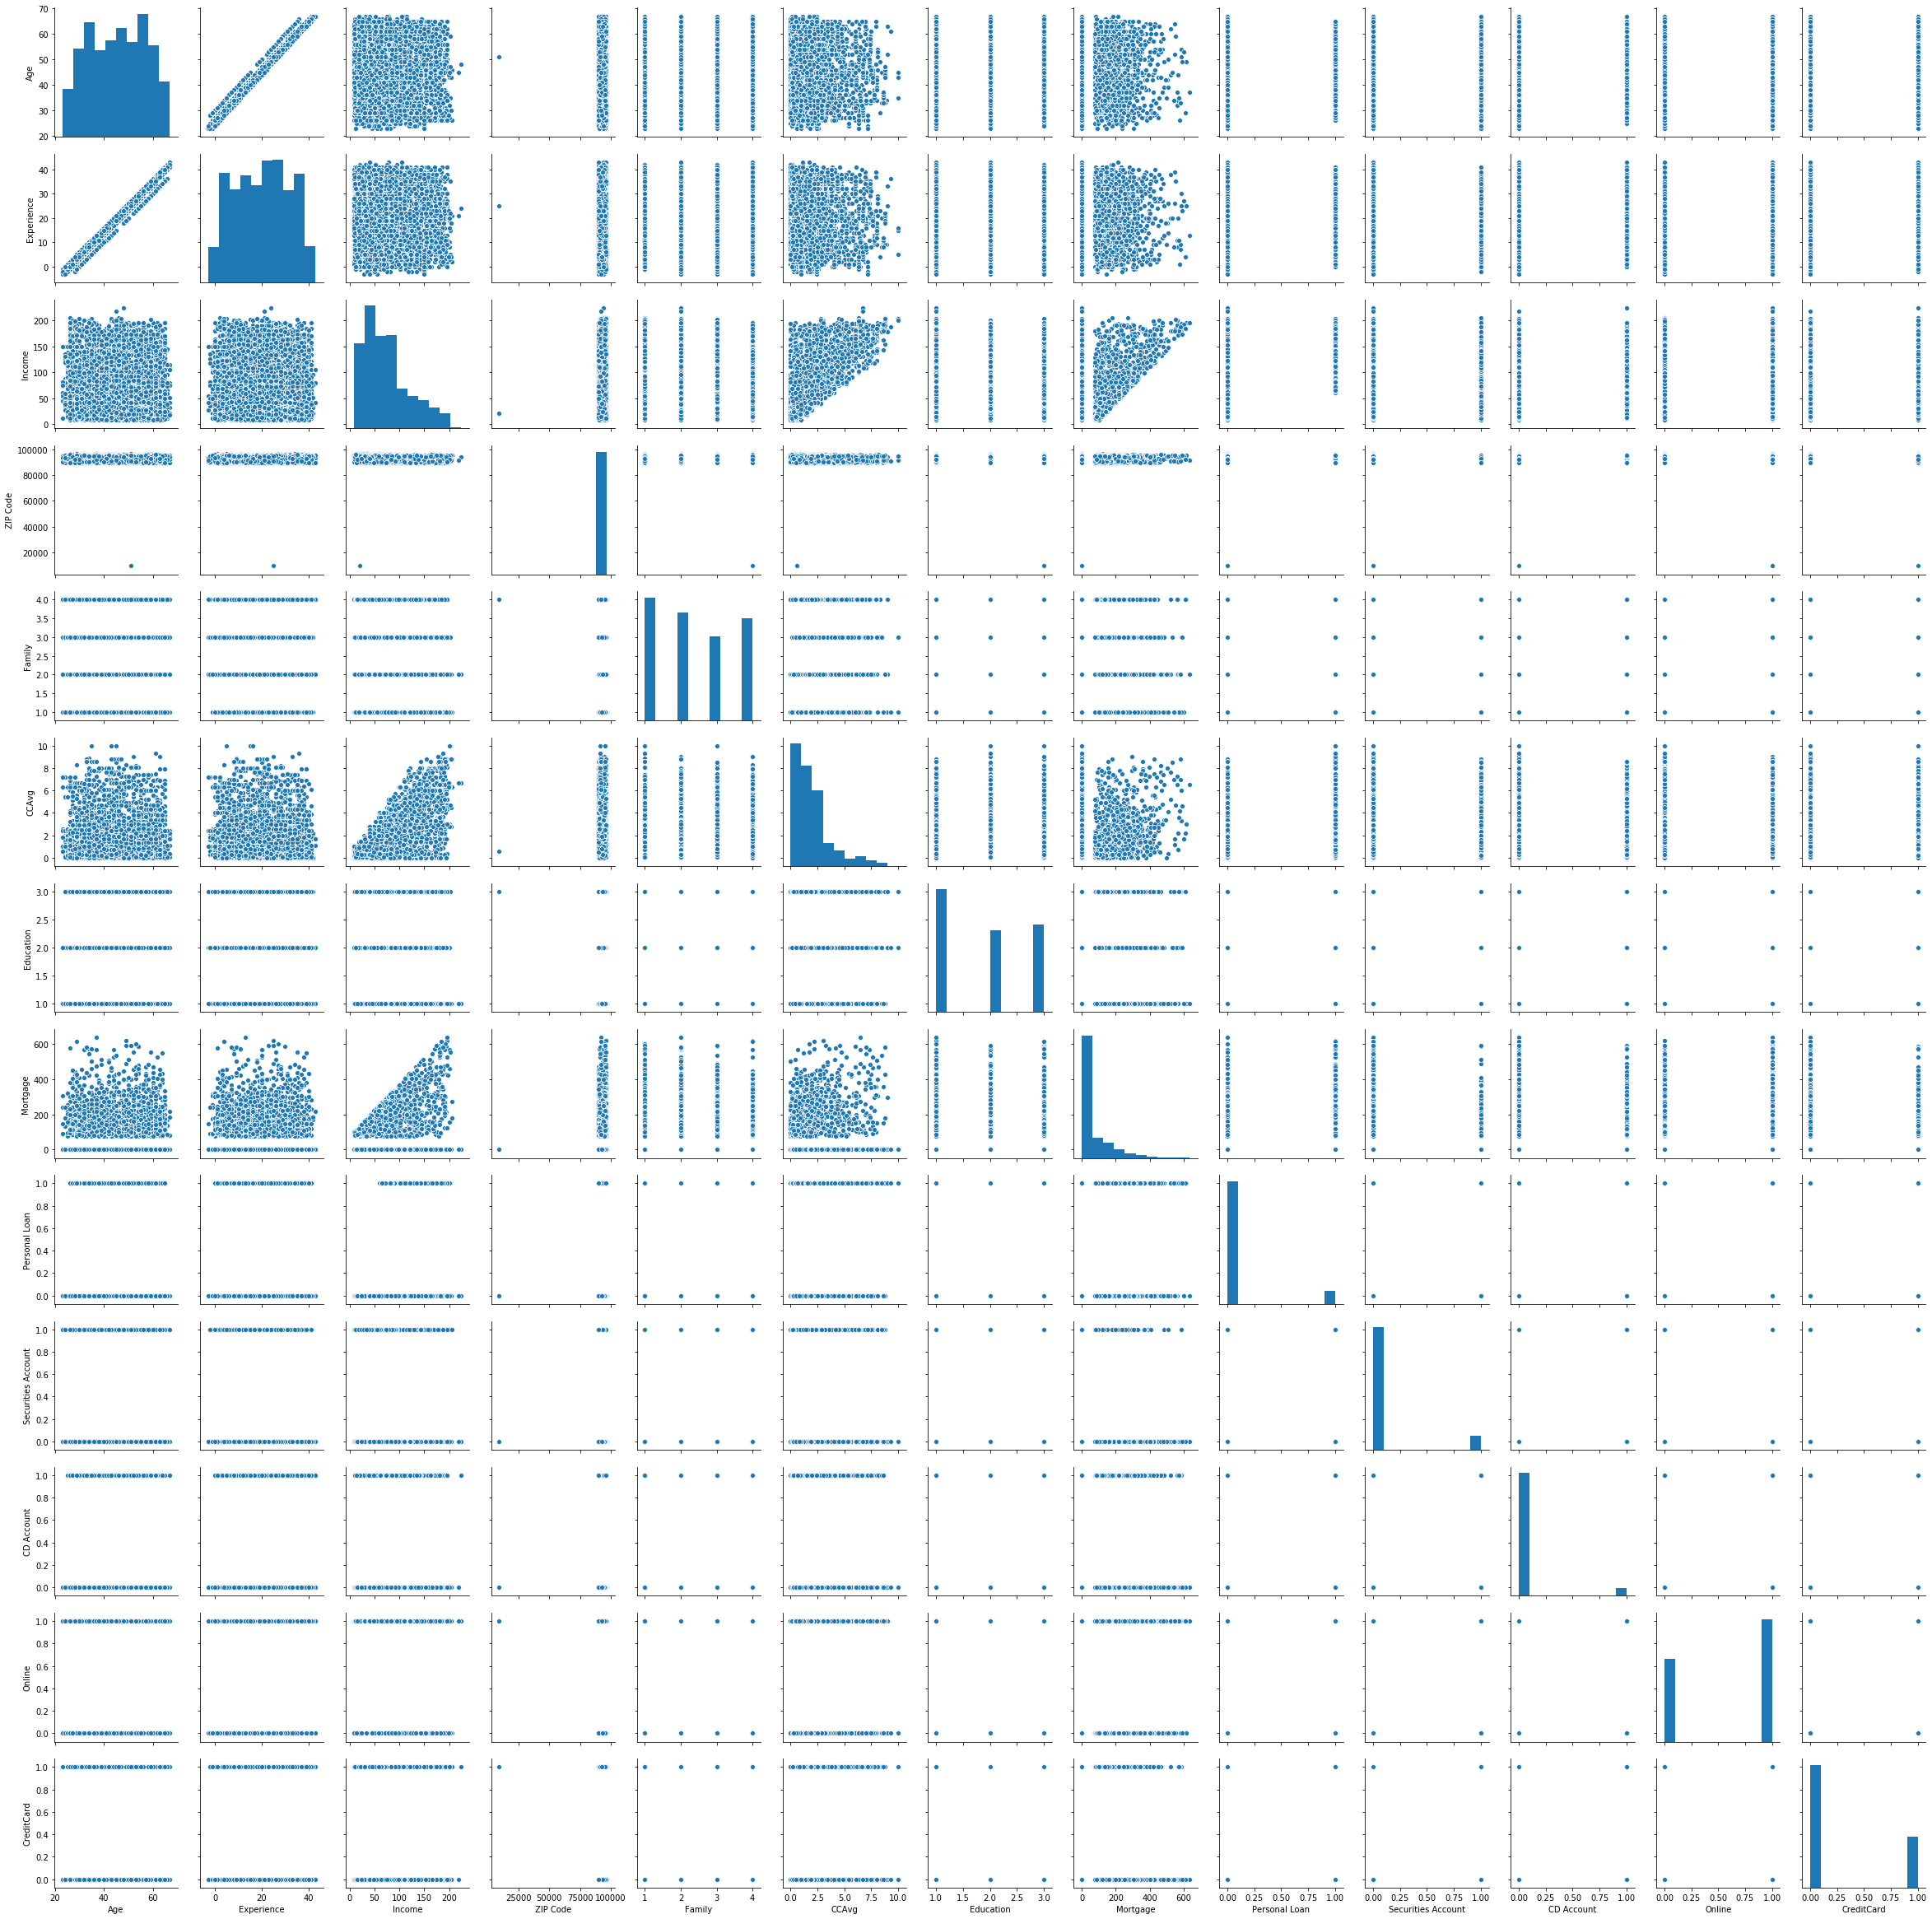

In [12]:
sns.pairplot(df)

In [55]:
print('income, ccavg and mortgage looks like right skewed')
print('age and experience are mostly normally distributed')

income, ccavg and mortgage looks like right skewed
age and experience are mostly normally distributed


In [56]:
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.976167,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.976167,1.000000,-0.049093,-0.028469,-0.045299,-0.048657,0.018204,-0.013436,-0.014195,-0.000445,0.005384,0.013437,0.008827
Income,-0.055269,-0.049093,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028469,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.045299,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048657,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018204,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013436,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014195,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000445,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [57]:
print('Experience and age has a very strong relationship, income has decent relationship with CCAvg, looks like personal loan depends on income significantly')

Experience and age has a very strong relationship, income has decent relationship with CCAvg, looks like personal loan depends on income significantly


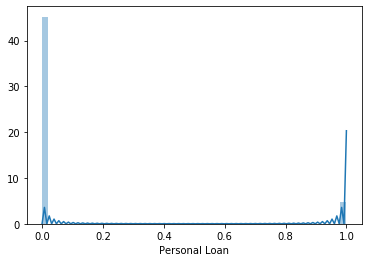

In [58]:
sns.distplot(df['Personal Loan'])

In [24]:
print('out of every 50 person, looks like 45 did not opt for loan and 5 took the loan')

out of every 50 person, looks like 45 did not opt for loan and 5 took the loan


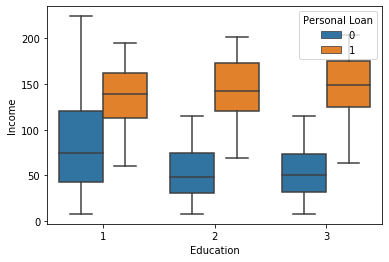

In [61]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

In [62]:
print('all person who have opted for personal loan belongs to the same income group, income has a strong relationship with people opting for personal loan, however for education 1 there is a slight overlap')

all person who have opted for personal loan belongs to the same income group, income has a strong relationship with people opting for personal loan, however for education 1 there is a slight overlap


In [64]:
y = df['Personal Loan']
X = df.drop('Personal Loan',axis=1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.7,random_state=1)

In [66]:
sc = preprocessing.StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

In [68]:
logModel = LogisticRegression()

In [69]:
logModel.fit(scaledX_train,y_train)

C:\Users\sumans\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
log_predictions = logModel.predict(scaledX_test)

In [81]:
acc_log = accuracy_score(y_test, log_predictions)
print(acc_log)

0.948


In [82]:
#confusion matrix for Logistic Regression model
print(confusion_matrix(y_test,log_predictions))

[[1336   15]
 [  63   86]]


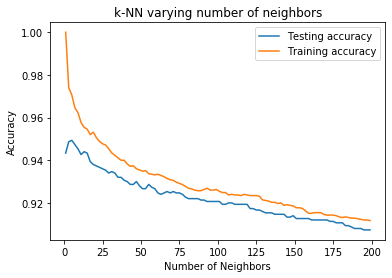

In [104]:
neighbors = np.arange(1,200,2)
train_accuracy_plot=np.empty(len(neighbors))
test_accuracy_plot=np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    train_accuracy_plot[i]=knn.score(scaledX_train,y_train)
    test_accuracy_plot[i]=knn.score(scaledX_test,y_test)
plt.title('k-NN varying number of neighbors')
plt.plot(neighbors,test_accuracy_plot,label='Testing accuracy')
plt.plot(neighbors,train_accuracy_plot,label='Training accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [105]:
print('looks like somewhere around k=20, we are getting the best balance between test accuracy and training accuracy')
knnModel = KNeighborsClassifier(n_neighbors=20)
knnModel.fit(scaledX_train,y_train)
knn_predictions = knnModel.predict(scaledX_test)
acc_knn = accuracy_score(y_test, knn_predictions)
print(acc_knn)
#confusion matrix for KNN model
print(confusion_matrix(y_test,knn_predictions))

looks like somewhere around k=20, we are getting the best balance between test accuracy and training accuracy
0.9366666666666666
[[1349    2]
 [  93   56]]


In [84]:
gbModel = GaussianNB()
gbModel.fit(scaledX_train,y_train)
gb_predictions = gbModel.predict(scaledX_test)
acc_gb = accuracy_score(y_test, gb_predictions)
print(acc_gb)
#confusion matrix for KNN model
print(confusion_matrix(y_test,gb_predictions))

0.876
[[1230  121]
 [  65   84]]


In [106]:
print('Logistic Regression model is giving the best accuracy of 0.948, and Gaussian Bayes is giving the least accuracy of 0.876')
print('Logistic Regression is able to give best result because it was able to minimize the false positive and false negatives. This is because it was able to separate the personal loan takers vs not takers more perfectly')

Logistic Regression model is giving the best accuracy of 0.948, and Gaussian Bayes is giving the least accuracy of 0.876
